# **Exemplo de implementação Árvore de Decisão**


In [5]:
#numpy and pandas initialization
import numpy as np
import pandas as pd

In [4]:
#Loading the PlayTennis data
from google.colab import files  
uploaded = files.upload()
breast = pd.read_csv("breast.csv")

Saving breast.csv to breast (2).csv


In [6]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Convertendo os valores categóricos (object) em dados numéricos com LabelEncoder:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [7]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

breast['id'] = Le.fit_transform(breast['id'])
breast['diagnosis'] = Le.fit_transform(breast['diagnosis'])

In [8]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,41,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,42,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,488,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,489,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,490,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,381,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,382,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,383,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,384,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Divisão da base de dados em treino e teste
* y - Obtem os valores da classe.
* X - Obtem os dados de treinamento (previsores).

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [10]:
df = breast.dropna(axis=1)
y = df['diagnosis']
X = df.drop(['id', 'diagnosis'],axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [12]:
# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train, y_train)

In [13]:
# The predictions are stored in X_pred
y_pred = clf.predict(X_test)

In [14]:
metrics.accuracy_score(y_test, y_pred)

0.935672514619883

In [15]:
y_proba = clf.predict_proba(X_test)

In [16]:
y_proba

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

[Text(0.5833333333333334, 0.9375, 'x[22] <= 117.45\nentropy = 0.961\nsamples = 398\nvalue = [245, 153]'),
 Text(0.5277777777777778, 0.8125, 'x[27] <= 0.16\nentropy = 0.535\nsamples = 279\nvalue = [245, 34]'),
 Text(0.4722222222222222, 0.6875, 'x[22] <= 102.05\nentropy = 0.373\nsamples = 264\nvalue = [245, 19]'),
 Text(0.2222222222222222, 0.5625, 'x[13] <= 48.975\nentropy = 0.135\nsamples = 212\nvalue = [208, 4]'),
 Text(0.1111111111111111, 0.4375, 'x[21] <= 33.35\nentropy = 0.078\nsamples = 209\nvalue = [207, 2]'),
 Text(0.05555555555555555, 0.3125, 'entropy = 0.0\nsamples = 197\nvalue = [197, 0]'),
 Text(0.16666666666666666, 0.3125, 'x[1] <= 23.2\nentropy = 0.65\nsamples = 12\nvalue = [10, 2]'),
 Text(0.1111111111111111, 0.1875, 'x[19] <= 0.002\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.0625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2222222222222222, 0.187

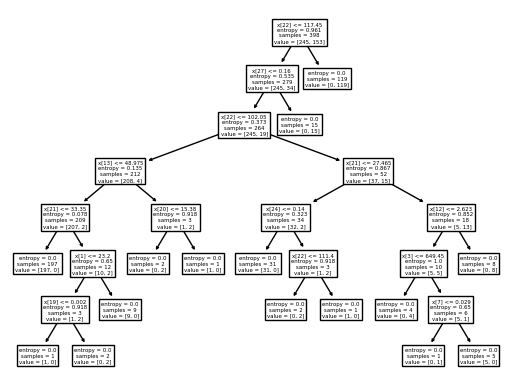

In [17]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(clf)

In [18]:
print(clf.feature_importances_)

[0.         0.01318985 0.         0.01594653 0.         0.
 0.         0.0101959  0.         0.         0.         0.
 0.01396866 0.02506151 0.         0.         0.         0.
 0.         0.00720194 0.00720194 0.07120855 0.68213632 0.
 0.02148607 0.         0.         0.13240272 0.         0.        ]


In [19]:
print(clf.feature_names_in_)

['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']


[GraphViz](https://www.graphviz.org/) gives a better and clearer Graph.

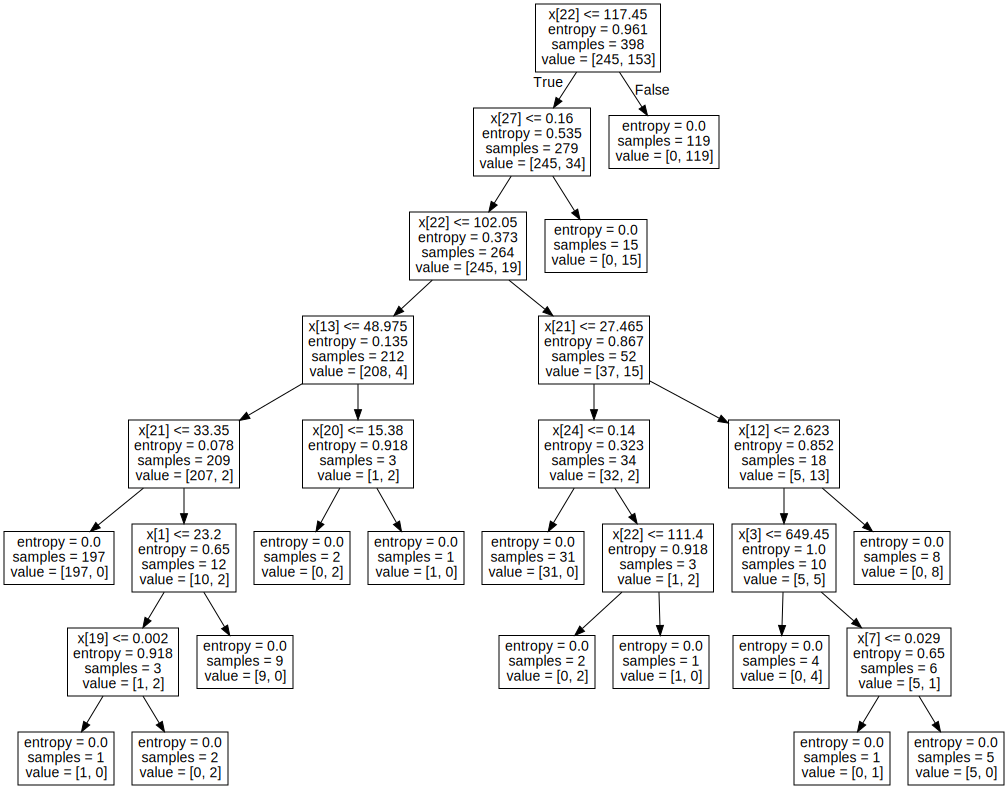

In [20]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In the above graph,

me recuso a legendar o grafico



Since we dont have any data to test. we can just make the model to predict our train data.